#Monte Carlo Simulation for Call Option Price w/ Visualisation of paths. 

In [75]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [50]:
#Pre compute relevant variables

S0 = 100 #Current price of underlying
r = 0.05 #Risk free rate representing drift
sigma = 0.1
t = 1 #Time perod of simulation
N = 252 #trading days in a year 
dt = t/N
r = 0.05 #Risk free rate used as proxy for drift 
paths = 1000 #Number of simulated paths
k = 105
B = 99 #Knock in barrier price


In [51]:
Z = np.random.standard_normal(size=(paths, N))

Discretizing the solution discussed above gives us a way to to calculate the log returns for each step $\Delta t$:

$$\ln S_{t + \Delta t} - \ln S_t = (\mu - \frac{\sigma^2}{2})\Delta t + \sigma \sqrt{\Delta t}Z$$
Where $Z \sim \mathcal{N}(0, 1)$

Scaling by $\sqrt{\Delta t}$ is necessary since a the Wiener process is $W_t \sim \mathcal{N}(0, t)$ and since

$$Var(aX + Y) = a^2 Var(X)$$





In [52]:
#Calculate returns paths in logarithmic space
increments = (r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z
logS = np.cumsum(increments, axis=1)

#Add column of zeros for time at S0
logS = np.hstack([np.zeros((paths, 1)), logS])  
S_paths = S0 * np.exp(logS)

##Plotting the results using matplotlib

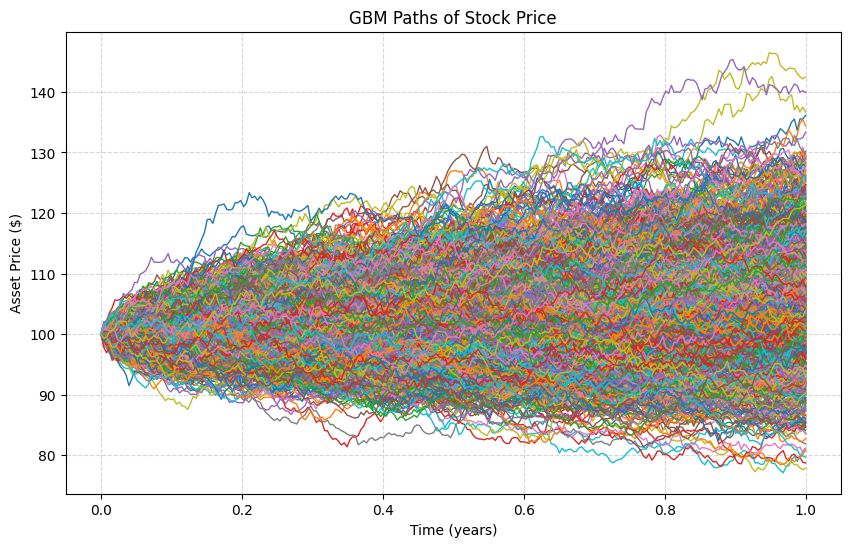

In [74]:
time_axis = np.linspace(0,1,N+1)

plt.figure(figsize=(10,6))
plt.clf()


for i in range(paths):
    plt.plot(time_axis, S_paths[i], lw=1)


plt.title("GBM Paths of Stock Price")
plt.xlabel("Time (years)")
plt.ylabel("Asset Price ($)")
plt.grid(True, linestyle = '--', alpha=0.5)
plt.show()
plt.close()

##Calcuating the simulated payoffs for the vanilla call option

The payoff function for the European call option is given below:

$$C_0 = max(S_t - K)$$

Where $K$ is the strike price and $S_t$ is the underlying asset price at expiry. 

In [68]:
#Calculation of vanilla call option pay off using simulated paths

payoff = np.maximum(S_paths[:,-1] - k, 0)

##Calculating the simulated payoffs for the barrier options


Using the formula below we calculate the payoff of the a knock in call option at expiry. 


$$C_t = 
\begin{cases}
max(S_t - K, 0), & if & Min S_t \le B_{in}  \\
0 & if & Min S_t \gt B_{in}\\
\end{cases}
$$

Where $B_{in}$ is the barrier for the option
 

In [ ]:
knock_in = np.zeros(paths)

for i in range(paths):
    for j in range(N+1):
        if S_paths[i,j] <= B:
            knock_in[i] = 1
            break
        
knock_in_payoff = knock_in * payoff

Using the formula below we calculate the payoff of the a knock out call option at expiry. 


$$C_t^{out} = 
\begin{cases}
max(S_t - K, 0), & if & Min S_t \gt B_{out}  \\
0 & if & Min S_t \le B_{out}\\
\end{cases}
$$

Where $B_{out}$ is is the barrier for 

In [70]:
#Calculate simulated option pay off for knock out
knock_out = np.ones(paths)

for i in range(paths):
    for j in range(N):
        if S_paths[i,j] <= B:
            knock_out[i] = 0
            break
        
knock_out_payoff = payoff * knock_out



Then calculate the presevent value of the mean of the payoffs using the the formula:

$$C_0 = C_t\exp(-rt)$$

In [73]:
#Calculate estimated call option value for the knock in option
C0 = np.exp(-r * t) * np.mean(payoff)
C0_knock_in = np.exp(-r * t) * np.mean(knock_in_payoff)
C0_knock_out = np.exp(-r * t) * np.mean(knock_out_payoff)

print(f"The value of the knock in call option is ${C0_knock_in:5.3f}")
print(f"The value of the knock out call option is ${C0_knock_out:5.3f}")
print(f"The value of the knock in + knock out is {C0_knock_in:5.3f} + {C0_knock_out:5.3f} = ${C0_knock_out + C0_knock_in:5.3f}")
print(f"The value of the vanilla call option is ${C0:5.3f}")



The value of the knock in call option is $2.261
The value of the knock out call option is $1.750
The value of the knock in + knock out is 2.261 + 1.750 = $4.010
The value of the vanilla call option is $4.010


##Asian Options

An Asian European option is an option who's payoff is the defined by the difference between the average of the underlying asset price during it's duration and the strike price. The formula for an asian call option is as follows: 


$$
C^{a}_t = max(G_t - K)  
$$

where $G_t$ is the arithmetic average of the underlying asset price for the duration of the option.

We now calculate the value of the Asian Option for the same simulated paths. 



In [67]:
averages = np.zeros(paths)

for i in range(paths):
    averages[i] = np.mean(S_paths[i])

asian_payoff = np.maximum(averages - k, 0)
C0_asian = np.exp(-r*t) * np.mean(asian_payoff)
print(f"The calcualted value of the Asian call option is ${C0_asian:5.3f}")


The calcualted value of the Asian call option is $1.352
